In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

/root/anaconda3/envs/tf1/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def DataScaler(data):
    scaler = preprocessing.StandardScaler().fit(data)
    scaled_data = scaler.transform(data)
    return scaled_data

In [3]:
# main function
raw_data = pd.read_csv('final_data.csv')
raw_df = pd.DataFrame({"hadm_id": raw_data.hadm_id,
    "gender": raw_data.gender,
    "race": raw_data.race,
    "age": raw_data.age,  
    "atrial_fibrillation": raw_data.atrial_fibrillation,
    "ischemic_stroke": raw_data.ischemic_stroke, 
    "trsnsient_ischemic_attack": raw_data.trsnsient_ischemic_attack,
    "peripheral_arterial_occusive": raw_data.peripheral_arterial_occusive, 
    "myocardial_infarction": raw_data.myocardial_infarction,
    "congestive_heart_failure": raw_data.congestive_heart_failure,
    "hypertension": raw_data.hypertension,
    "diabates_mellitus": raw_data.diabates_mellitus,
    "hyperlipidemia": raw_data.hyperlipidemia,
    "aspirin": raw_data.aspirin,
    "warfarin":raw_data.warfarin,
    "bb": raw_data.bb,
    "heartrate_max": raw_data.heartrate_max,
    "map_min": raw_data.map_min,
    "base_excess_val": raw_data.base_excess_val,
    "ph_val": raw_data.ph_val,
    "hemoglobin_val": raw_data.hemoglobin_val,
    "lactate_val": raw_data.lactate_val,
    "pt_val": raw_data.pt_val,
    "ptt_val": raw_data.ptt_val,
    "inr_val": raw_data.inr_val,
    "urea_nitrogen_val": raw_data.urea_nitrogen_val,
    "creatinine_val": raw_data.creatinine_val,
    "platelet_count_val": raw_data.platelet_count_val,
    "bilirubin_val": raw_data.bilirubin_val,
    "albumin_val": raw_data.albumin_val,
    "varice": raw_data.varice,
    "label": raw_data.trans
})
# change the race and gender into values
raw_df['gender'] = raw_df['gender'].replace(['F'], 1)
raw_df['gender'] = raw_df['gender'].replace(['M'], 0)
raw_df['race'] = raw_df['race'].replace(['WHITE'], 1)
raw_df['race'] = raw_df['race'].replace(['BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO - DOMINICAN',
       'WHITE - OTHER EUROPEAN', 'OTHER', 'ASIAN','UNKNOWN'],0)
raw_df['race'] = raw_df['race'].replace(['ASIAN - CHINESE', 'BLACK/CARIBBEAN ISLAND', 'BLACK/CAPE VERDEAN',
       'ASIAN - SOUTH EAST ASIAN', 'HISPANIC/LATINO - PUERTO RICAN',
       'WHITE - RUSSIAN', 'WHITE - EASTERN EUROPEAN'],0)
raw_df['race'] = raw_df['race'].replace(['PATIENT DECLINED TO ANSWER', 'MULTIPLE RACE/ETHNICITY',
       'HISPANIC/LATINO - HONDURAN', 'UNABLE TO OBTAIN', 'PORTUGUESE',
       'HISPANIC/LATINO - COLUMBIAN', 'HISPANIC OR LATINO'],0)
raw_df['race'] = raw_df['race'].replace(['AMERICAN INDIAN/ALASKA NATIVE', 'BLACK/AFRICAN',
       'WHITE - BRAZILIAN', 'HISPANIC/LATINO - GUATEMALAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - MEXICAN',
       'SOUTH AMERICAN'],0)
raw_df['race'] = raw_df['race'].replace(['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'ASIAN - ASIAN INDIAN', 'ASIAN - KOREAN'],0)
raw_df['gender']=raw_df['gender'].astype(float)
raw_df['race']=raw_df['race'].astype(float)
raw_df

,hadm_id,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,varice,label
0,21080282,1.0,1.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,...,12.6,23.5,1.2,18.0,0.5,182.0,0.4,3.3,0,1
1,24970864,1.0,1.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,25.0,1.6,622.0,0.1,NaN,0,1
2,27196888,0.0,1.0,55.191310,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,29.5,1.2,21.0,0.6,102.0,3.2,2.7,0,1
3,28432198,1.0,1.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,...,12.7,28.0,1.2,13.0,0.6,279.0,NaN,NaN,0,1
4,21765388,0.0,1.0,52.317101,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,28.1,1.2,21.0,1.1,100.0,1.2,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,26927108,1.0,1.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,30.0,0.9,407.0,0.4,NaN,0,0
3287,25399885,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,5.0,0.6,279.0,NaN,3.4,0,0
3288,22194922,0.0,1.0,25.790832,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,26.0,0.8,229.0,0.3,NaN,1,0
3289,22978484,0.0,1.0,67.983994,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,NaN,2.1,13.0,0.6,909.0,0.4,NaN,0,0


In [4]:
# data pre-processing
all_features = list(raw_df)
target = ['label']
features = list(set(all_features)-set(target))
# raw_df.features = DataScaler(raw_df.features)
# raw_df[:,features] = DataScaler(raw_df[:,features])

# fill the binary missing values
raw_df['atrial_fibrillation'] = raw_df['atrial_fibrillation'].fillna(0)
raw_df['ischemic_stroke'] = raw_df['ischemic_stroke'].fillna(0)
raw_df['trsnsient_ischemic_attack'] = raw_df['trsnsient_ischemic_attack'].fillna(0)
raw_df['peripheral_arterial_occusive'] = raw_df['peripheral_arterial_occusive'].fillna(0)
raw_df['myocardial_infarction'] = raw_df['myocardial_infarction'].fillna(0)
raw_df['congestive_heart_failure'] = raw_df['congestive_heart_failure'].fillna(0)
raw_df['hypertension'] = raw_df['hypertension'].fillna(0)
raw_df['diabates_mellitus'] = raw_df['diabates_mellitus'].fillna(0)
raw_df['hyperlipidemia'] = raw_df['hyperlipidemia'].fillna(0)
raw_df['aspirin'] = raw_df['aspirin'].fillna(0)
raw_df['warfarin'] = raw_df['warfarin'].fillna(0)
raw_df['bb'] = raw_df['bb'].fillna(0)

raw_df
# raw_df(raw_df.info())

,hadm_id,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,varice,label
0,21080282,1.0,1.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,...,12.6,23.5,1.2,18.0,0.5,182.0,0.4,3.3,0,1
1,24970864,1.0,1.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,25.0,1.6,622.0,0.1,NaN,0,1
2,27196888,0.0,1.0,55.191310,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,29.5,1.2,21.0,0.6,102.0,3.2,2.7,0,1
3,28432198,1.0,1.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,...,12.7,28.0,1.2,13.0,0.6,279.0,NaN,NaN,0,1
4,21765388,0.0,1.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,28.1,1.2,21.0,1.1,100.0,1.2,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,26927108,1.0,1.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,30.0,0.9,407.0,0.4,NaN,0,0
3287,25399885,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,5.0,0.6,279.0,NaN,3.4,0,0
3288,22194922,0.0,1.0,25.790832,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,26.0,0.8,229.0,0.3,NaN,1,0
3289,22978484,0.0,1.0,67.983994,0.0,0.0,0.0,0.0,0.0,0.0,...,23.0,NaN,2.1,13.0,0.6,909.0,0.4,NaN,0,0


In [5]:
# Imputing the continous values with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = raw_df.filter(['heartrate_max','map_min','base_excess_val','ph_val','hemoglobin_val','lactate_val','pt_val','ptt_val','inr_val','urea_nitrogen_val','creatinine_val','platelet_count_val','bilirubin_val','albumin_val'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)
df_binary = raw_df.filter(['hadm_id','gender','race','atrial_fibrillation','ischemic_stroke','trsnsient_ischemic_attack','peripheral_arterial_occusive','myocardial_infarction','congestive_heart_failure','hypertension','diabates_mellitus','hyperlipidemia','aspirin','warfarin','bb','label'], axis=1).copy()
# df = df_binary.merge(df_knn_imputed, on='hadm_id',how='left')

In [6]:
# Impute with mean imputation
from sklearn.impute import SimpleImputer
df = raw_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df['heartrate_max'] = mean_imputer.fit_transform(df['heartrate_max'].values.reshape(-1,1))
df['map_min'] = mean_imputer.fit_transform(df['map_min'].values.reshape(-1,1))
df['base_excess_val'] = mean_imputer.fit_transform(df['base_excess_val'].values.reshape(-1,1))
df['ph_val'] = mean_imputer.fit_transform(df['ph_val'].values.reshape(-1,1))
df['hemoglobin_val'] = mean_imputer.fit_transform(df['hemoglobin_val'].values.reshape(-1,1))
df['lactate_val'] = mean_imputer.fit_transform(df['lactate_val'].values.reshape(-1,1))
df['pt_val'] = mean_imputer.fit_transform(df['pt_val'].values.reshape(-1,1))
df['ptt_val'] = mean_imputer.fit_transform(df['ptt_val'].values.reshape(-1,1))
df['inr_val'] = mean_imputer.fit_transform(df['inr_val'].values.reshape(-1,1))
df['urea_nitrogen_val'] = mean_imputer.fit_transform(df['urea_nitrogen_val'].values.reshape(-1,1))
df['creatinine_val'] = mean_imputer.fit_transform(df['creatinine_val'].values.reshape(-1,1))
df['platelet_count_val'] = mean_imputer.fit_transform(df['platelet_count_val'].values.reshape(-1,1))
df['bilirubin_val'] = mean_imputer.fit_transform(df['bilirubin_val'].values.reshape(-1,1))
df['albumin_val'] = mean_imputer.fit_transform(df['albumin_val'].values.reshape(-1,1))
df

,hadm_id,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,varice,label
0,21080282,1.0,1.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,...,12.600000,23.500000,1.200000,18.0,0.5,182.0,0.400000,3.30000,0,1
1,24970864,1.0,1.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,...,16.162652,34.298953,1.499209,25.0,1.6,622.0,0.100000,3.20387,0,1
2,27196888,0.0,1.0,55.191310,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,29.500000,1.200000,21.0,0.6,102.0,3.200000,2.70000,0,1
3,28432198,1.0,1.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,...,12.700000,28.000000,1.200000,13.0,0.6,279.0,1.521564,3.20387,0,1
4,21765388,0.0,1.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,28.100000,1.200000,21.0,1.1,100.0,1.200000,3.20387,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,26927108,1.0,1.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,...,16.162652,34.298953,1.499209,30.0,0.9,407.0,0.400000,3.20387,0,0
3287,25399885,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,...,16.162652,34.298953,1.499209,5.0,0.6,279.0,1.521564,3.40000,0,0
3288,22194922,0.0,1.0,25.790832,0.0,0.0,0.0,0.0,0.0,0.0,...,16.162652,34.298953,1.499209,26.0,0.8,229.0,0.300000,3.20387,1,0
3289,22978484,0.0,1.0,67.983994,0.0,0.0,0.0,0.0,0.0,0.0,...,23.000000,34.298953,2.100000,13.0,0.6,909.0,0.400000,3.20387,0,0


In [7]:
# reduce the dtype
df = df.astype('float32')

In [ ]:
# output csv


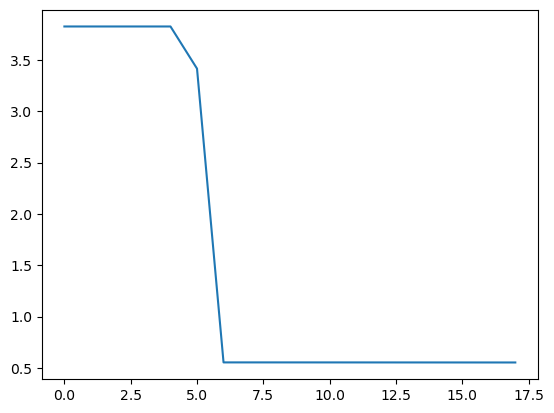

In [8]:
train_data = df.sample(2500)
test_data = df.drop(train_data.index)
x_train = train_data.drop(target,axis=1)
y_train = train_data.loc[:,'label']
x_valid = test_data.drop(target,axis=1)
y_valid = test_data.loc[:,'label']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

classifier = MLPClassifier(
    solver='adam',  # ‘lbfgs’, ‘sgd’, ‘adam’
    alpha=1e-5, 
    hidden_layer_sizes=(4,4,3),
    random_state=1,
    max_iter=1500
)

classifier.fit(x_train, y_train)
import matplotlib.pyplot as plt
loss_values = classifier.loss_curve_

plt.plot(loss_values)
plt.show()


In [9]:
# Accuracy
predicted_label = classifier.predict(np.asarray(test_data.drop(target,axis=1)))
test_data.loc[:,'predicted_label'] = predicted_label
accuracy = float(len(test_data.loc[test_data['label'] == test_data['predicted_label'],:]))/float(len(test_data))
accuracy

0.7850821744627055

## 

In [111]:
# AUC ROC
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_valid, predicted_label)
print('roc_auc_score for MLP: ', roc_auc_score(y_valid, predicted_label))

roc_auc_score for DecisionTree:  0.5


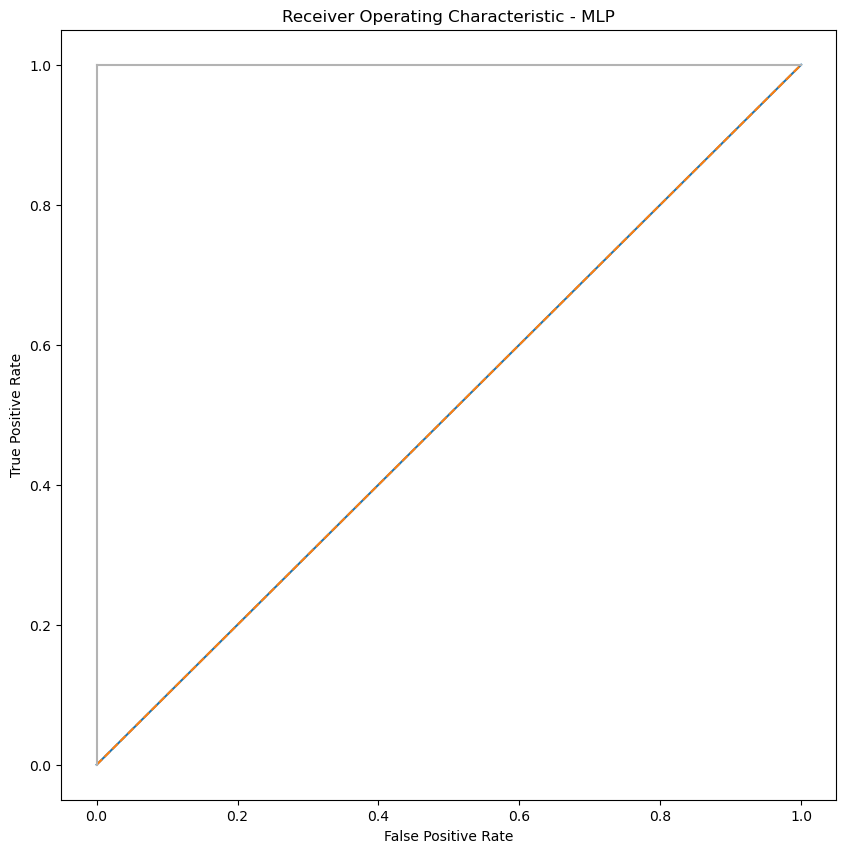

In [112]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - MLP')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()